In [1]:
library('tidyverse')
library('ggplot2')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
Warning message:
“package ‘stringr’ was built under R version 4.2.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Dataset

- This data set describes over 2500 plain dark chocolate bars. 
- There are totally 10 columns, which are ref, company_manufacturer, company_location, review_date, country_of_bean_origin, specific_bean_origin_or_bar_name, cocoa_percent, ingredients, most_memorable_characteristics, and rating. 
- Not all of them are used in this project. For an instance, ref is just an identification for each record, which is not appropriate to analyze it.

In [2]:
choco = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-18/chocolate.csv', col_types = cols())
choco |> head()

ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80%,"3- B,S,C","mildly bitter, basic cocoa, fatty",3.25


### Some Visualizations

1. The first two plots show the information about the country of origin. In plot 1, it shows the number of chocolate bars from each country. Since there are too many countries, only the 25 countries that have the most chocolate bars are plotted individually. 

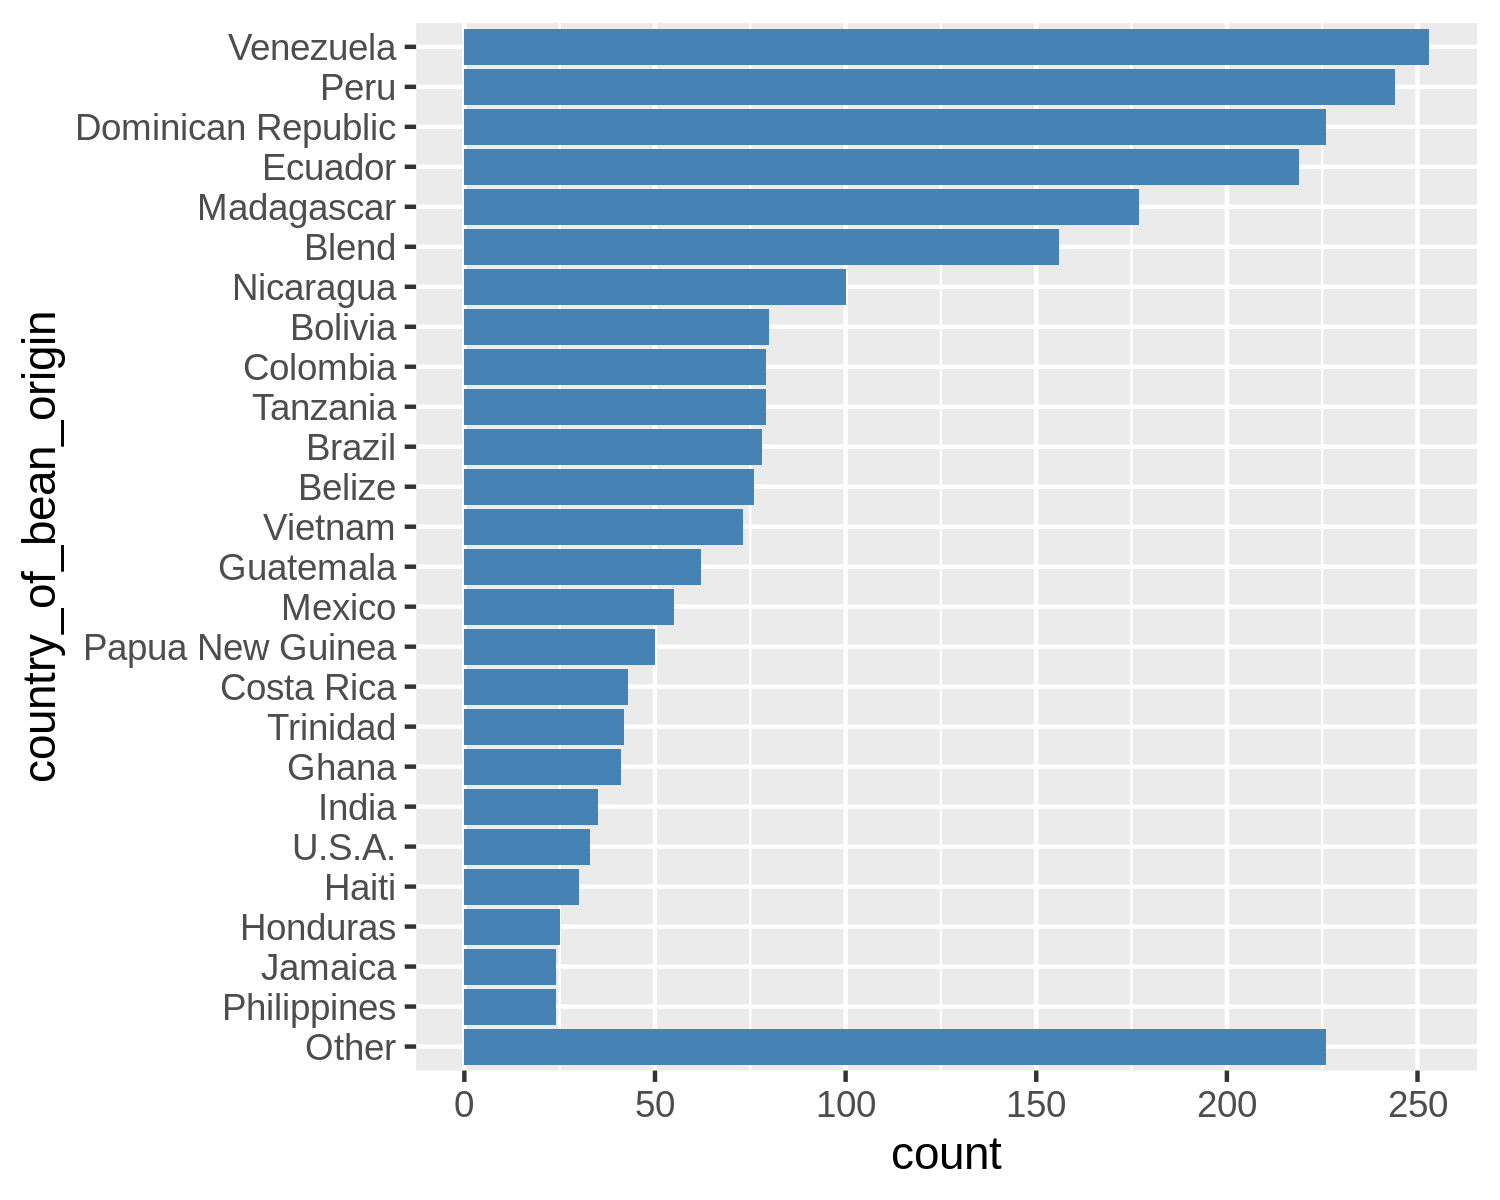

In [3]:
choco2 = choco |>
    mutate(country_of_bean_origin = country_of_bean_origin |> fct_lump(n = 25) |> fct_infreq() |> fct_rev() |> fct_relevel('Other', after = 0))

p = ggplot(choco2, aes(y = country_of_bean_origin)) + geom_bar(fill = 'steelblue')
p

2. Plot 2 shows the detailed information about the rating to the chocolate bars from each country. Since each country has many records, there would be a lot of points overlapping with each other. Therefore, jitter is applied to solve the issue. 

In [4]:
choco4 = choco |>
    mutate(country_of_bean_origin = country_of_bean_origin |> fct_lump(n = 6) |> fct_infreq() |> fct_rev() |> fct_relevel('Other', after = 0))


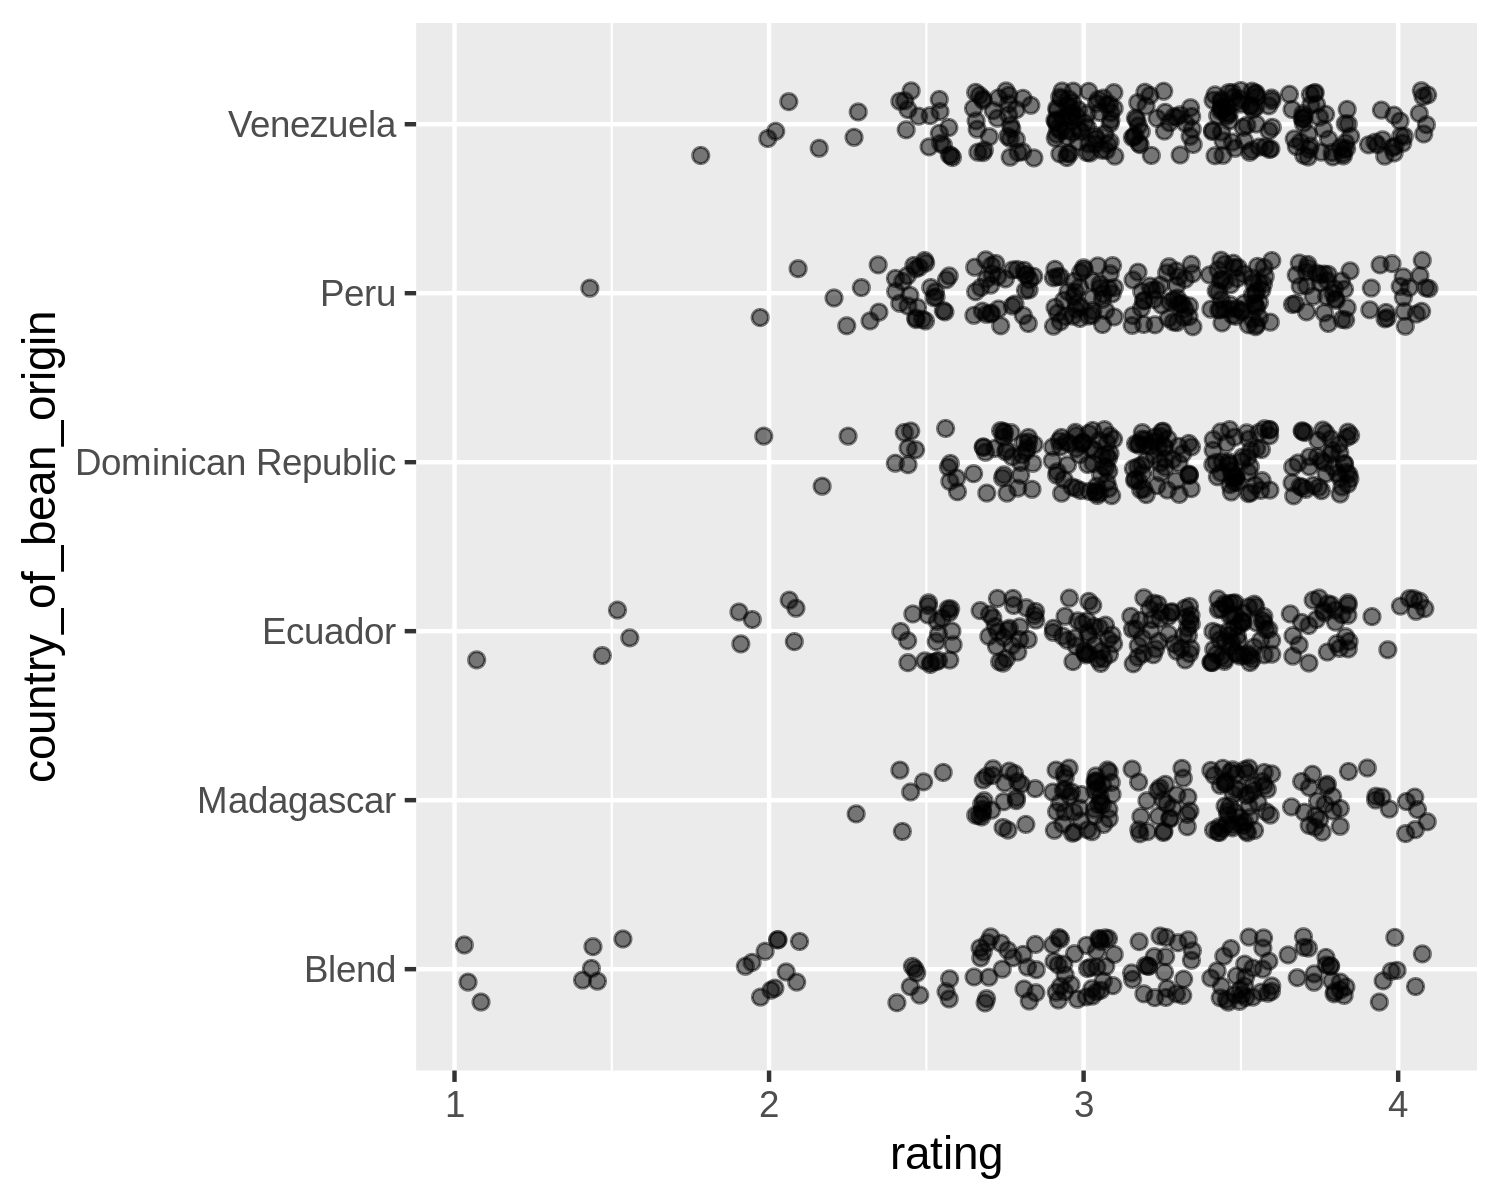

In [5]:
p = ggplot(choco4 |> filter(country_of_bean_origin != 'Other'), aes(x = rating, y = country_of_bean_origin))

p = p + geom_point(position = position_jitter(h = 0.2), alpha = 0.5)

p

3. The third plot shows the cocoa percentage information. The y-axis means the percentage of the chocolate bars that have cocoa percentage less than or equal to the x-axis value. One of the challenges in this part is that the cocoa_percent is character type, so the arrange function would regard 100% as the lowest, which should be the highest. To solve this issue, the % sign is removed, and the other digits are transformed to integer type. 

In [6]:
choco = transform(choco, cocoa_p = as.numeric(ifelse(nchar(choco$cocoa_percent)==3, substr(choco$cocoa_percent, 1, 2), substr(choco$cocoa_percent, 1, 3))))

choco3 = choco |>
    arrange(cocoa_p) |>
    mutate(ypos = row_number() / n()) 

choco3 |> head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,cocoa_p,ypos
,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1149,Chokolat Elot (Girard),Martinique,2013,Martinique,Guadeloupe,42%,"4- B,S,V,L","gritty, sweet, hot cocoa",2.75,42,0.0003952569
2,552,Luker,Colombia,2010,Blend,"Selva, Colombia, Ecuador",46%,"5- B,S,C,V,L","very sweet, caramel, candy",2.75,46,0.0007905138
3,572,AMMA,Brazil,2010,Brazil,"Monte Alegre, 3 diff. plantations",50%,"4- B,S,C,L","very sweet, bright red, banana",3.75,50,0.0011857708
4,32,Santander (Compania Nacional),Colombia,2006,Colombia,Colombian Semi Dark,53%,"5- B,S,C,V,L","too sweet, candy-like",2.00,53,0.0015810277
5,370,Aequare (Gianduja),Ecuador,2009,Ecuador,"Los Rios, Quevedo, Arriba",55%,"4- B,S,C,V","sandy, sweet, banana cream",2.75,55,0.0019762846
6,797,Bernachon,France,2012,Blend,Nature,55%,"5- B,S,C,V,L","sweet, vanilla, cocoa",2.75,55,0.0023715415


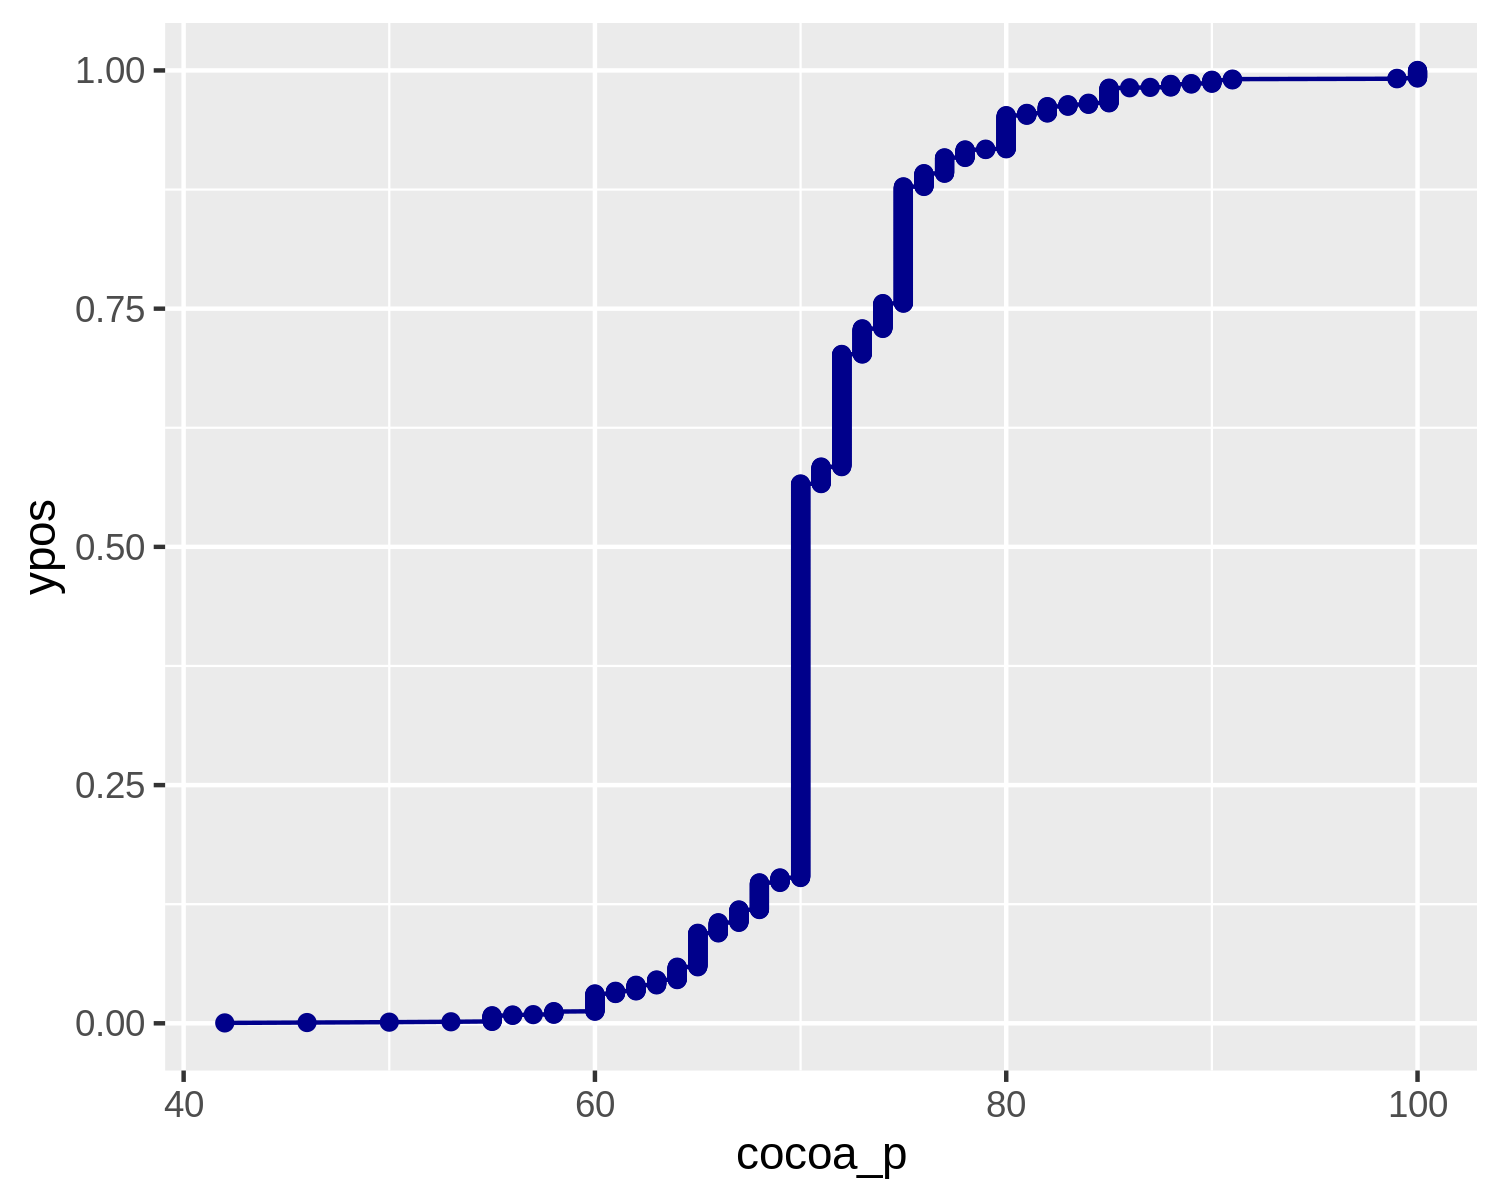

In [7]:
p = ggplot(choco3, aes(x = cocoa_p, y = ypos)) +
    geom_point(color = 'darkblue') +
    geom_line(color = 'darkblue')

p

4. The fourth plot shows the rate distribution in different year. The rating value is classified into six ranges to plot.

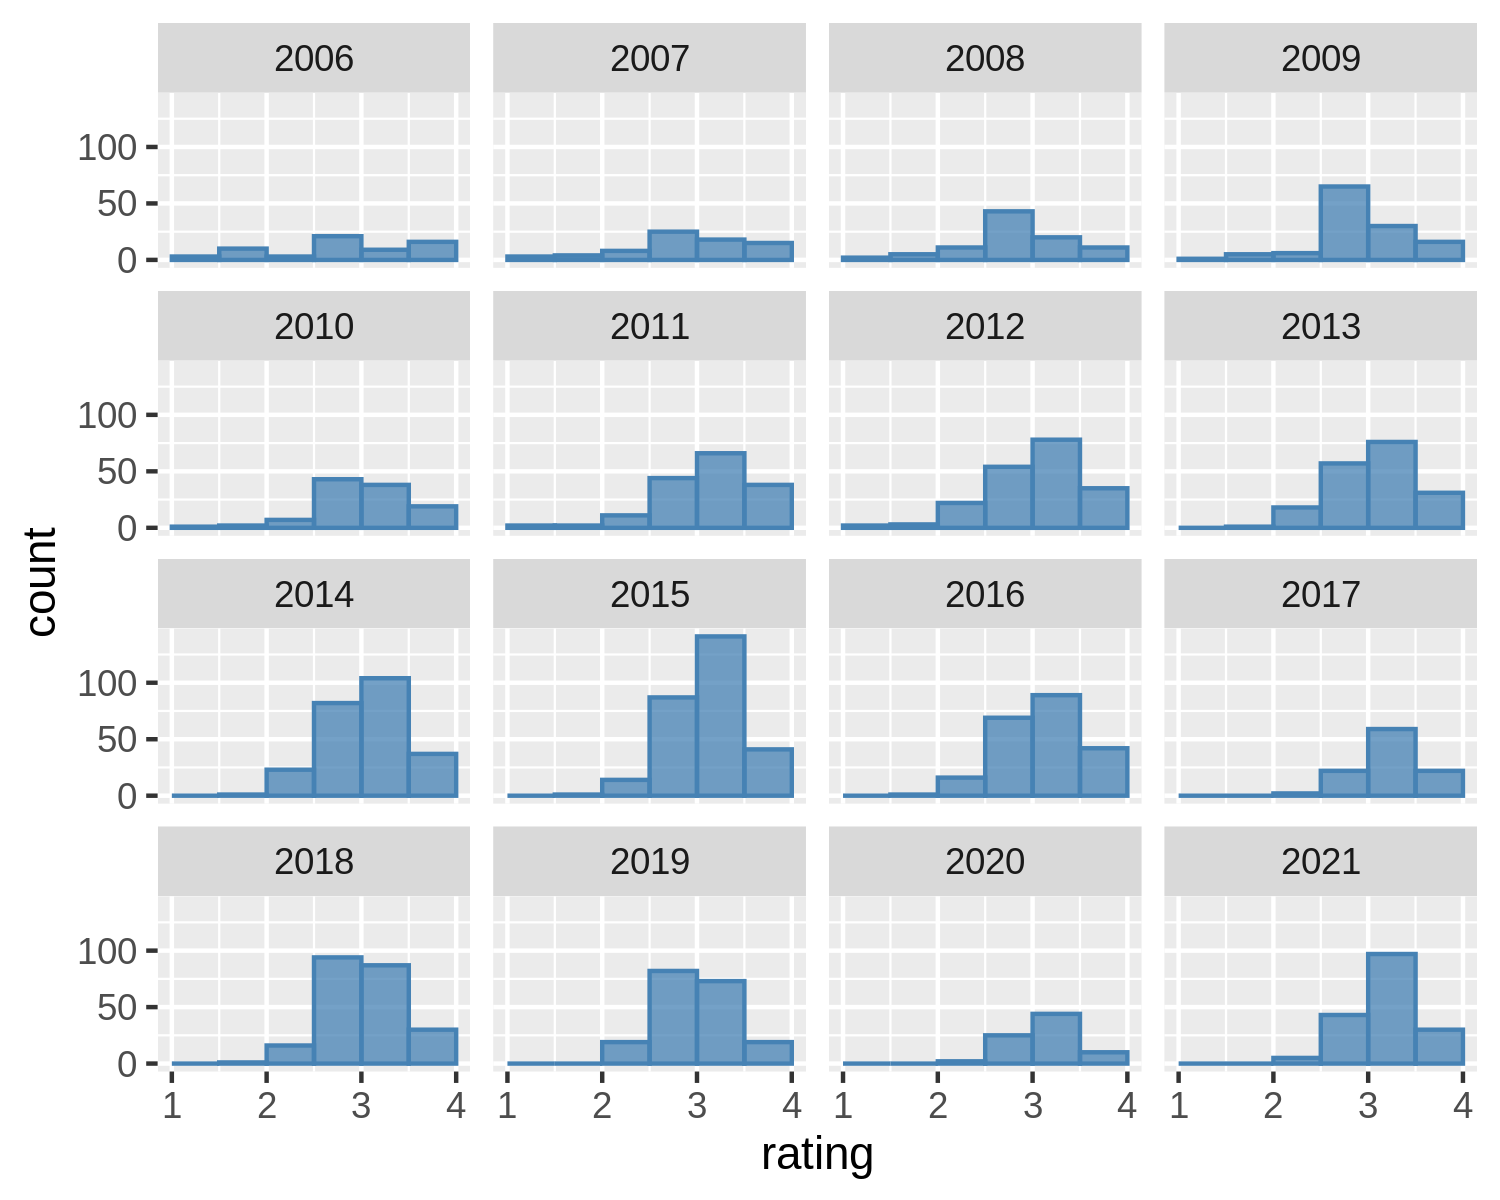

In [8]:
p = ggplot(choco, aes(x = rating)) + 
    geom_histogram(breaks = seq(1, 4, 0.5), na.rm = TRUE, alpha = 0.75, binwidth = 70, color="steelblue", fill="steelblue") +
    facet_wrap(~review_date)

p